# **EDA PROJECT**

Avram Mihai, Ghdadamiyan Lida, Patrascu Valentin (407 AI), Neferu Ana Maria (405 BDTS)

# Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
mydata = pd.read_csv('SolarPrediction.csv')

# Data Preprocessing

In [3]:
mydata

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [4]:
import datetime

#Date

mydata['Year'] = pd.DatetimeIndex(mydata['Data']).year
mydata['Month'] = pd.DatetimeIndex(mydata['Data']).month
mydata['Day'] = pd.DatetimeIndex(mydata['Data']).day
mydata.head()

#Time 

mydata['Hour'] = pd.DatetimeIndex(mydata['Time']).hour
mydata['Minute'] = pd.DatetimeIndex(mydata['Time']).minute
mydata['Second'] = pd.DatetimeIndex(mydata['Time']).second

mydata.head()


mydata['SunPerDay'] = pd.DatetimeIndex(mydata['TimeSunSet']) - pd.DatetimeIndex(mydata['TimeSunRise'])
mydata.head()

mydata['SunPerDayHours'] = pd.DatetimeIndex(mydata['TimeSunSet']).hour - pd.DatetimeIndex(mydata['TimeSunRise']).hour 



In [5]:
mydata.drop('Time', axis = 1, inplace=True)
mydata.drop('Data', axis = 1, inplace=True)
mydata.drop('TimeSunRise', axis = 1, inplace=True)
mydata.drop('TimeSunSet', axis = 1, inplace=True)
mydata.drop('SunPerDay', axis = 1, inplace=True)

mydata.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1475229326,1.21,48,30.46,59,177.39,5.62,2016,9,29,23,55,26,12
1,1475229023,1.21,48,30.46,58,176.78,3.37,2016,9,29,23,50,23,12
2,1475228726,1.23,48,30.46,57,158.75,3.37,2016,9,29,23,45,26,12
3,1475228421,1.21,48,30.46,60,137.71,3.37,2016,9,29,23,40,21,12
4,1475228124,1.17,48,30.46,62,104.95,5.62,2016,9,29,23,35,24,12


In [6]:
mydata.isnull().sum()

UNIXTime                  0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
SunPerDayHours            0
dtype: int64

We don't have Null values

# Filtering data

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   Year                    32686 non-null  int64  
 8   Month                   32686 non-null  int64  
 9   Day                     32686 non-null  int64  
 10  Hour                    32686 non-null  int64  
 11  Minute                  32686 non-null  int64  
 12  Second                  32686 non-null  int64  
 13  SunPerDayHours          32686 non-null  int64  
dtypes: float64(4), int64(10)
memory usage:

In [8]:
mydata.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Year,Month,Day,Hour,Minute,Second,SunPerDayHours
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,2016.0,10.526066,15.825766,11.557425,27.556691,17.441902,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.0,1.096691,8.711824,6.912034,17.268507,12.951109,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,2016.0,9.000000,1.000000,0.000000,0.000000,0.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,2016.0,10.000000,9.000000,6.000000,15.000000,5.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,2016.0,11.000000,16.000000,12.000000,30.000000,18.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,2016.0,11.000000,23.000000,18.000000,45.000000,22.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,2016.0,12.000000,31.000000,23.000000,57.000000,59.000000,12.000000


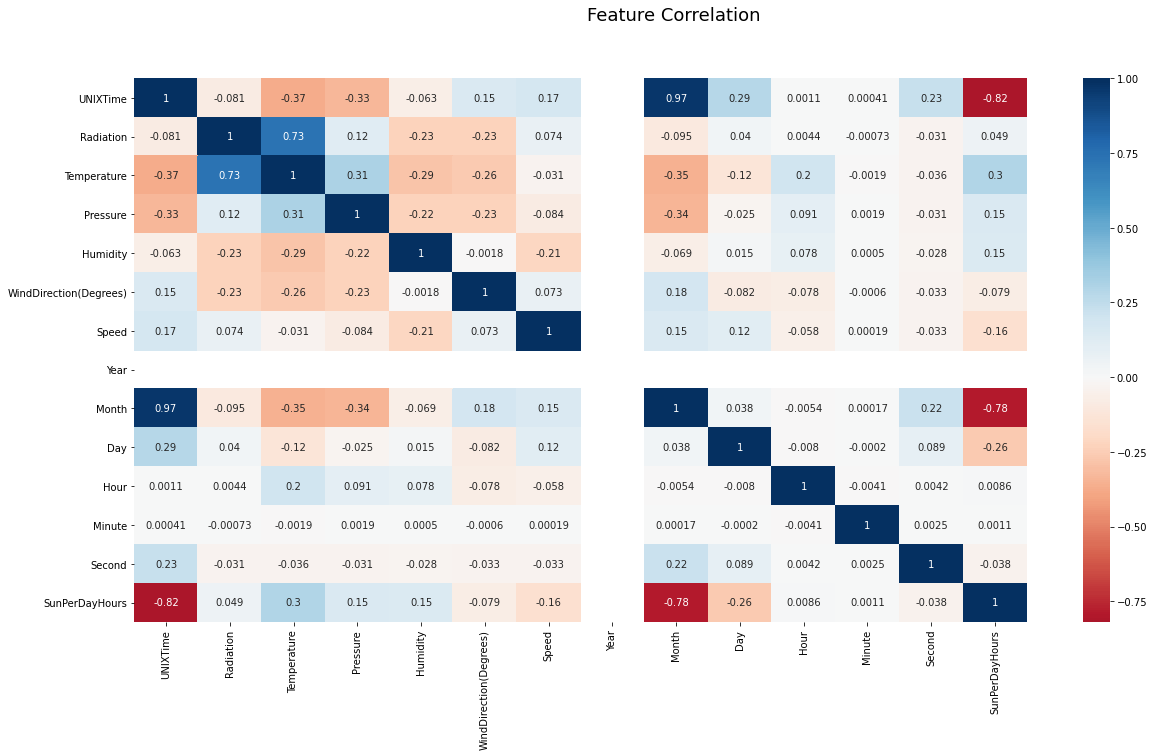

In [9]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(mydata.corr(), annot=True, cmap='RdBu', center=0)

In [10]:
# Eliminating the pozitive correlated data
mydata.drop('UNIXTime', axis = 1, inplace=True)
mydata.drop('Year', axis = 1, inplace=True)

In [11]:
mydata.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12


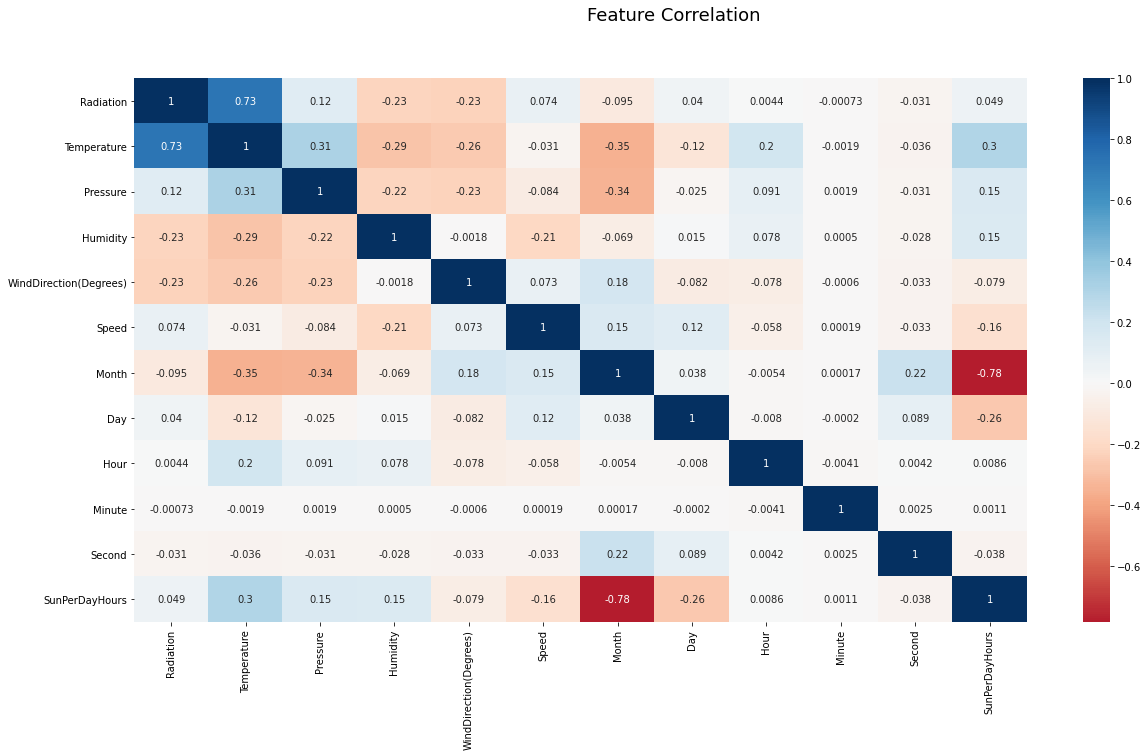

In [12]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(mydata.corr(), annot=True, cmap='RdBu', center=0)

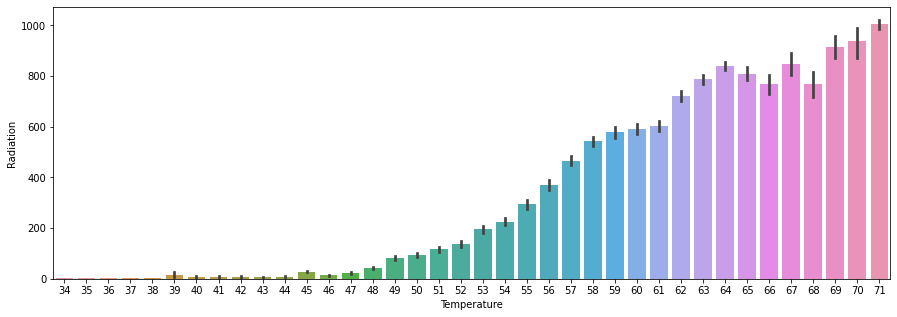

In [13]:
import seaborn as sns

fig2 = plt.figure(figsize=(15,5))
sns.barplot(x=mydata['Temperature'],y=mydata['Radiation'])

Temperature is directly proportional with the radiation, so it is an important feature

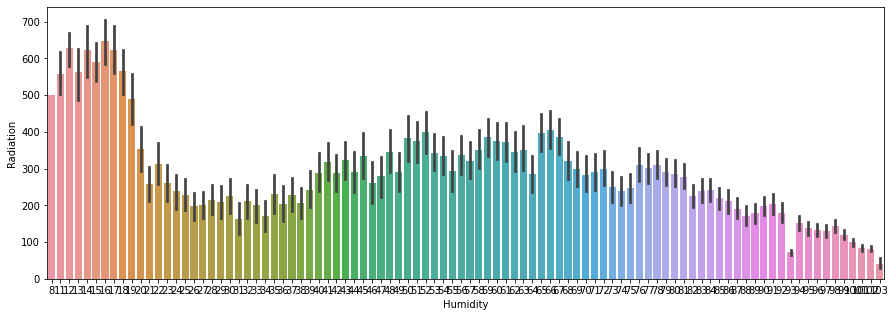

In [14]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=mydata['Humidity'],y=mydata['Radiation'])

# Outliers removal
Applying Z score for every feature and keeping the one that its absolute value is smaller than our threshhold(3)

In [15]:
# Temperature	Pressure	Humidity	WindDirection(Degrees)	Speed	Month	Day	Hour	Minute	Second	SunPerDayHours
threshold = 4

outliers = [] 

for i in mydata['Temperature']: 
    z = (i- np.mean(mydata['Temperature']))/np.std(mydata['Temperature'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Temperature are: ', outliers) 

The outliers in Temperature are:  []


In [16]:
outliers = [] 

for i in mydata['Pressure']: 
    z = (i- np.mean(mydata['Pressure']))/np.std(mydata['Pressure'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Pressure are: ', outliers)

The outliers in Pressure are:  []


In [17]:
outliers = [] 

for i in mydata['Humidity']: 
    z = (i- np.mean(mydata['Humidity']))/np.std(mydata['Humidity'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Humidity are: ', outliers)

The outliers in Humidity are:  []


In [18]:
outliers = [] 

for i in mydata['WindDirection(Degrees)']: 
    z = (i- np.mean(mydata['WindDirection(Degrees)']))/np.std(mydata['WindDirection(Degrees)'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in WindDirection(Degrees): ', outliers)

The outliers in WindDirection(Degrees):  []


In [19]:
outliers = [] 

for i in mydata['Speed']: 
    z = (i- np.mean(mydata['Speed']))/np.std(mydata['Speed'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Speed: ', outliers)

The outliers in Speed:  [20.25, 20.25, 20.25, 21.37, 23.62, 22.5, 22.5, 27.0, 20.25, 21.37, 23.62, 20.25, 29.25, 24.75, 23.62, 23.62, 24.75, 31.5, 23.62, 24.75, 20.25, 24.75, 23.62, 20.25, 20.25, 29.25, 23.62, 25.87, 33.75, 28.12, 36.0, 27.0, 24.75, 24.75, 31.5, 27.0, 32.62, 31.5, 30.37, 36.0, 22.5, 27.0, 25.87, 27.0, 33.75, 29.25, 21.37, 23.62, 20.25, 23.62, 33.75, 28.12, 36.0, 23.62, 25.87, 25.87, 32.62, 37.12, 25.87, 27.0, 21.37, 27.0, 24.75, 24.75, 28.12, 31.5, 23.62, 22.5, 24.75, 29.25, 28.12, 24.75, 30.37, 20.25, 25.87, 22.5, 21.37, 20.25, 30.37, 24.75, 31.5, 20.25, 30.37, 29.25, 31.5, 29.25, 34.87, 31.5, 38.25, 33.75, 21.37, 34.87, 24.75, 25.87, 28.12, 23.62, 32.62, 23.62, 32.62, 28.12, 29.25, 23.62, 21.37, 39.37, 32.62, 30.37, 38.25, 32.62, 21.37, 34.87, 37.12, 24.75, 40.5, 24.75, 28.12, 24.75, 31.5, 31.5, 22.5, 29.25, 25.87, 30.37, 32.62, 27.0, 29.25, 20.25, 22.5, 20.25, 20.25, 23.62, 20.25, 27.0, 20.25, 22.5, 24.75, 21.37, 21.37, 23.62, 20.25, 20.25, 20.25, 20.25, 20.25, 20.2

In [20]:
outliers = [] 

for i in mydata['Month']: 
    z = (i- np.mean(mydata['Month']))/np.std(mydata['Month'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Month: ', outliers)

The outliers in Month:  []


In [21]:
threshold = 4
outliers = [] 

for i in mydata['Day']: 
    z = (i- np.mean(mydata['Day']))/np.std(mydata['Day'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Day: ', outliers)

The outliers in Day:  []


In [22]:
outliers = [] 

for i in mydata['Hour']: 
    z = (i- np.mean(mydata['Hour']))/np.std(mydata['Hour'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Hour: ', outliers)

The outliers in Hour:  []


In [23]:
outliers = [] 

for i in mydata['Minute']: 
    z = (i- np.mean(mydata['Minute']))/np.std(mydata['Minute'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Minute: ', outliers)

The outliers in Minute:  []


In [24]:
outliers = [] 

for i in mydata['Second']: 
    z = (i- np.mean(mydata['Second']))/np.std(mydata['Second'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in Second: ', outliers)

The outliers in Second:  []


In [25]:
outliers = [] 

for i in mydata['SunPerDayHours']: 
    z = (i- np.mean(mydata['SunPerDayHours']))/np.std(mydata['SunPerDayHours'])
    if z > threshold: 
        outliers.append(i) 
print('The outliers in SunPerDayHours: ', outliers)

The outliers in SunPerDayHours:  []


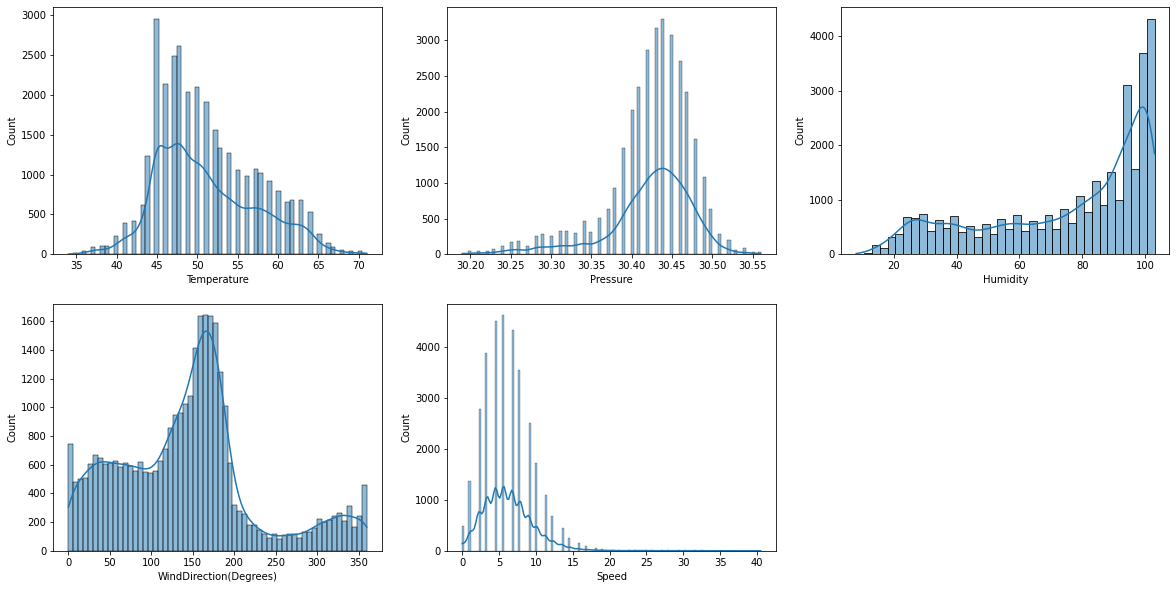

In [26]:
plt.figure(figsize=(20,10))

distr = mydata[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

for i, column in enumerate(distr):
    plt.subplot(2,3,i+1)
    sns.histplot(distr[column],kde=True)

In [27]:
from scipy import stats

mydata[(np.abs(stats.zscore(mydata)) < 4).all(axis=1)]

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,SunPerDayHours
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,12
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,12
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,12
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,12
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,12
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,12,1,0,20,4,11
32682,1.17,44,30.42,102,117.78,6.75,12,1,0,15,1,11
32683,1.20,44,30.42,102,145.19,9.00,12,1,0,10,1,11
32684,1.23,44,30.42,101,164.19,7.87,12,1,0,5,2,11


# Spliting the data

In [28]:
mydata1 = mydata.iloc[:,1:]
labels = mydata.iloc[:,0]

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(mydata1, labels, test_size = 0.2, random_state = 25)

# Models

In [30]:
mae_list = []
mse_list = []
r2_list = []
var_list = []
max_list = []

## Linear Regression

                        importance
Month                    49.695969
Temperature              44.572736
Speed                     4.620685
Day                       4.299371
Humidity                  0.554228
Minute                    0.032777
WindDirection(Degrees)   -0.231202
Second                   -1.264069
Hour                     -7.581172
SunPerDayHours          -26.231275
Pressure               -404.739539


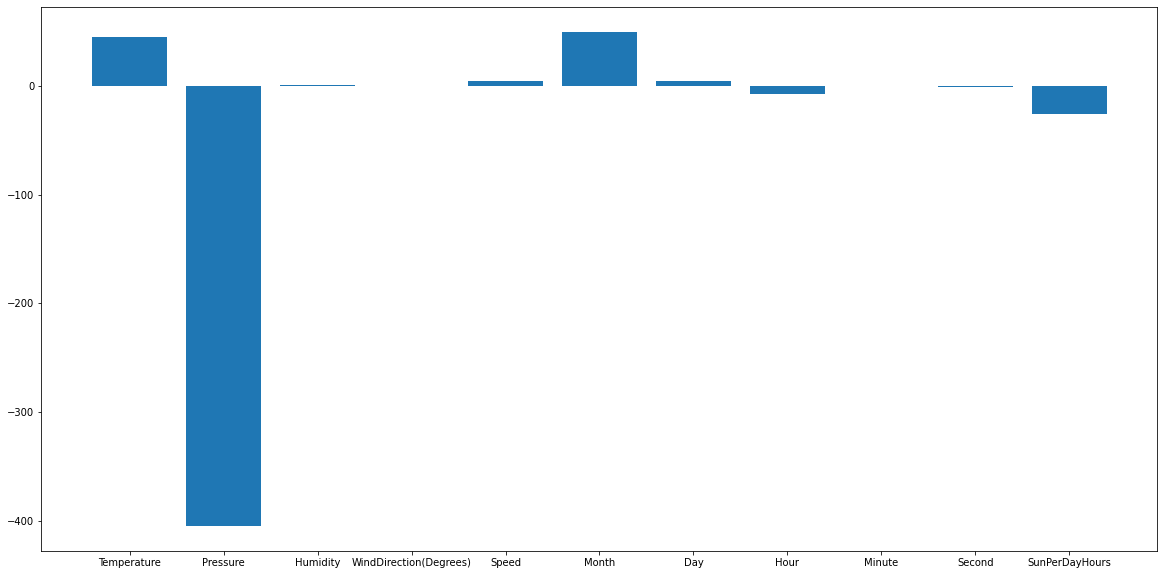

In [31]:
model1 = LinearRegression()
model1.fit(train_data, train_labels)

columns_ = [ 'Temperature',	'Pressure',	'Humidity',	'WindDirection(Degrees)',	'Speed',	'Month',	'Day',	'Hour',	'Minute',	'Second', 'SunPerDayHours']

plt.figure(figsize=(20,10))
plt.bar(columns_, model1.coef_)

feature_importances = pd.DataFrame(model1.coef_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

In [32]:
Model1 = LinearRegression()
Model1.fit(train_data, train_labels)
Pred1 = Model1.predict(test_data)

In [33]:
# Evaluation
mae_list.append(mean_absolute_error(test_labels, Pred1))
mse_list.append(mean_squared_error(test_labels, Pred1))
r2_list.append(r2_score(test_labels, Pred1))
var_list.append(explained_variance_score(test_labels, Pred1))
max_list.append(max_error(test_labels, Pred1))

print('MAE : ', mean_absolute_error(test_labels, Pred1))
print('MSE : ', mean_squared_error(test_labels, Pred1))
print('R^2 : ', r2_score(test_labels, Pred1))
print('Var : ', explained_variance_score(test_labels, Pred1))
print('Max : ', max_error(test_labels, Pred1))

MAE :  145.53663438816486
MSE :  36765.7328385265
R^2 :  0.6308764850087383
Var :  0.6309326107714461
Max :  1047.1185829606309


## RandomForestRegressor

                        importance
Temperature               0.565583
Hour                      0.283937
Humidity                  0.038736
Day                       0.034635
WindDirection(Degrees)    0.016243
Pressure                  0.015735
Minute                    0.014027
Second                    0.010665
Month                     0.009242
Speed                     0.007434
SunPerDayHours            0.003763


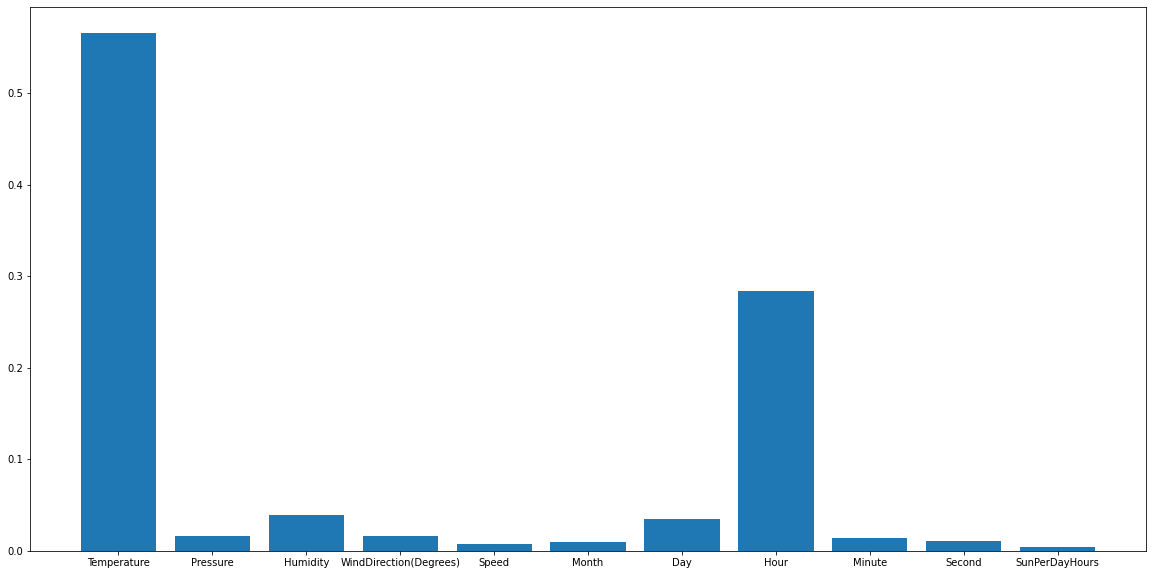

In [34]:
model2 = RandomForestRegressor()
model2.fit(train_data,train_labels)

columns_ = [ 'Temperature',	'Pressure',	'Humidity',	'WindDirection(Degrees)',	'Speed',	'Month',	'Day',	'Hour',	'Minute',	'Second', 'SunPerDayHours']

plt.figure(figsize=(20,10))
plt.bar(columns_, model2.feature_importances_)

feature_importances = pd.DataFrame(model2.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

In [35]:
# param_grid={
#             'max_depth': [None, 3, 7],
#             'n_estimators': [100, 250, 500],
#             'max_features': ['auto', 'sqrt', 'log2'],
#             }

# grid_search = GridSearchCV(
#             estimator=RandomForestRegressor(),
#             param_grid=param_grid,
#             cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

# grid_result = grid_search.fit(train_data, train_labels)
# results = grid_search.cv_results_
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print("Mean score", np.sqrt(-mean_score), "with the following params")
#     print(params)

# print("Best estim: ")
# print(grid_search.best_estimator_)

In [36]:
Model2 = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features='auto')
Model2.fit(train_data, train_labels)
Pred2 = Model2.predict(test_data)

In [37]:
# Evaluation
mae_list.append(mean_absolute_error(test_labels, Pred2))
mse_list.append(mean_squared_error(test_labels, Pred2))
r2_list.append(r2_score(test_labels, Pred2))
var_list.append(explained_variance_score(test_labels, Pred2))
max_list.append(max_error(test_labels, Pred2))

print('MAE : ', mean_absolute_error(test_labels, Pred2 ))
print('MSE : ', mean_squared_error(test_labels, Pred2 ))
print('R^2 : ', r2_score(test_labels, Pred2 ))
print('Var : ', explained_variance_score(test_labels, Pred2 ))
print('Max : ', max_error(test_labels, Pred2 ))

MAE :  30.345296592230046
MSE :  6509.2861614720105
R^2 :  0.9346475535096984
Var :  0.9346675264977196
Max :  909.3956000000014


## XgBoost

[18:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                        importance
Temperature               0.605661
Hour                      0.211503
Humidity                  0.037184
WindDirection(Degrees)    0.037130
SunPerDayHours            0.034316
Day                       0.025697
Second                    0.015492
Pressure                  0.012314
Month                     0.008366
Minute                    0.007135
Speed                     0.005204


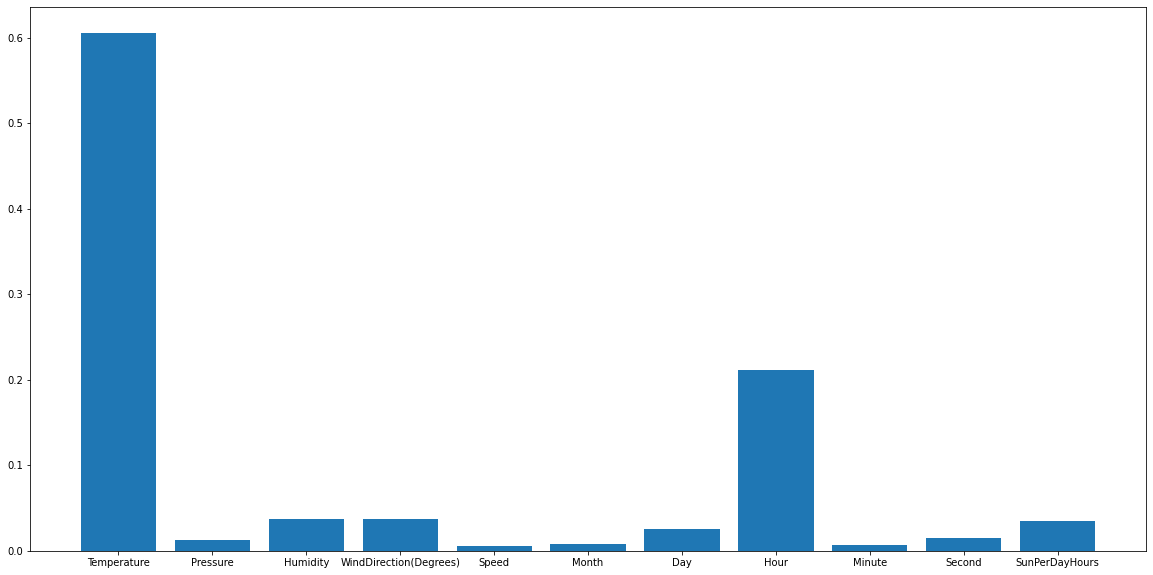

In [38]:
model3 = XGBRegressor()
model3.fit(train_data, train_labels)

columns_ = [ 'Temperature',	'Pressure',	'Humidity',	'WindDirection(Degrees)',	'Speed',	'Month',	'Day',	'Hour',	'Minute',	'Second', 'SunPerDayHours']

plt.figure(figsize=(20,10))
plt.bar(columns_, model3.feature_importances_)

feature_importances = pd.DataFrame(model3.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)


In [39]:
#param_grid = {
#            'min_child_weight': [1, 4, 7],
#            'gamma': [0, 0.5, 1],
#            'subsample': [0.8, 1],
#            'colsample_bytree':[0.8, 1],
#            'max_depth': [3, 6, 9],
#            }

#grid_search = GridSearchCV(
#            estimator=XGBRegressor(objective = 'reg:squarederror'),
#            param_grid=param_grid,
#            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

#grid_result = grid_search.fit(train_data, train_labels)
#results = grid_search.cv_results_
#for mean_score, params in zip(results['mean_test_score'], results['params']):
#    print("Mean score", np.sqrt(-mean_score), "with the following params")
#    print(params)

#print("Best estim: ")
#print(grid_search.best_estimator_)

In [40]:
Model3 = XGBRegressor(objective = 'reg:squarederror',
                      colsample_bytree=0.8, gamma=0,
                      max_depth=9, min_child_weight=4,
                      subsample=0.8)
Model3.fit(train_data, train_labels)
Pred3 = Model3.predict(test_data)

In [41]:
mae_list.append(mean_absolute_error(test_labels, Pred3))
mse_list.append(mean_squared_error(test_labels, Pred3))
r2_list.append(r2_score(test_labels, Pred3))
var_list.append(explained_variance_score(test_labels, Pred3))
max_list.append(max_error(test_labels, Pred3))


print('MAE : ', mean_absolute_error(test_labels, Pred3 ))
print('MSE : ', mean_squared_error(test_labels, Pred3 ))
print('R^2 : ', r2_score(test_labels, Pred3 ))
print('Var : ', explained_variance_score(test_labels, Pred3 ))
print('Max : ', max_error(test_labels, Pred3 ))

MAE :  36.45372562953167
MSE :  7011.396019976234
R^2 :  0.9296064312044026
Var :  0.9296161064797657
Max :  1033.2645776367187


## Decission Trees

                        importance
Temperature               0.559622
Hour                      0.290425
Humidity                  0.041396
Day                       0.034428
Minute                    0.015925
Pressure                  0.015487
WindDirection(Degrees)    0.014536
Second                    0.009435
Month                     0.009284
Speed                     0.007493
SunPerDayHours            0.001969


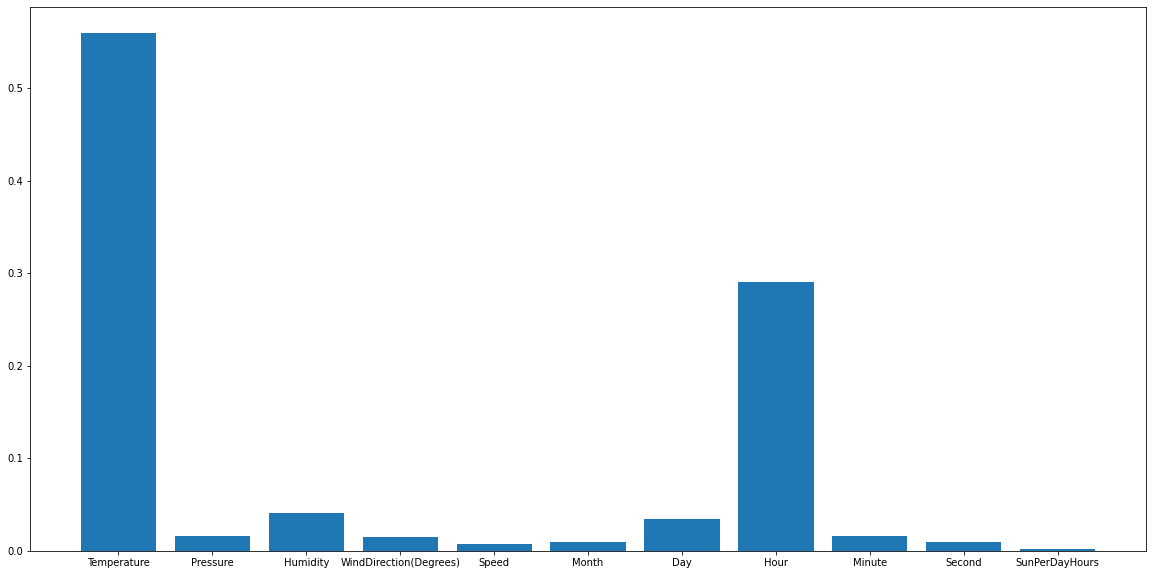

In [42]:
model4 = DecisionTreeRegressor()
model4.fit(train_data, train_labels)

columns_ = [ 'Temperature',	'Pressure',	'Humidity',	'WindDirection(Degrees)',	'Speed',	'Month',	'Day',	'Hour',	'Minute',	'Second', 'SunPerDayHours']

plt.figure(figsize=(20,10))
plt.bar(columns_, model4.feature_importances_)

feature_importances = pd.DataFrame(model4.feature_importances_,index = columns_,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

In [43]:
# param_grid = {
#     'max_depth': [None, 3, 5, 10], 
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'random_state': [None, 1, 2, 3, 4], 
#     'min_samples_split': [2, 3, 4]}    

# grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, cv=5,
#                            scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
# grid_search.fit(train_data, train_labels)

# results = grid_search.cv_results_
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print("Mean score", np.sqrt(-mean_score), "with the following params",params)

# print("Best estim: ")
# grid_search.best_estimator_

In [44]:
Model4 = DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_split=4, random_state=1)
Model4.fit(train_data, train_labels)
Pred4 = Model4.predict(test_data)

In [45]:
mae_list.append(mean_absolute_error(test_labels, Pred4))
mse_list.append(mean_squared_error(test_labels, Pred4))
r2_list.append(r2_score(test_labels, Pred4))
var_list.append(explained_variance_score(test_labels, Pred4))
max_list.append(max_error(test_labels, Pred4))

print('MAE : ', mean_absolute_error(test_labels, Pred4 ))
print('MSE : ', mean_squared_error(test_labels, Pred4 ))
print('R^2 : ', r2_score(test_labels, Pred4 ))
print('Var : ', explained_variance_score(test_labels, Pred4 ))
print('Max : ', max_error(test_labels, Pred4 ))

MAE :  42.841940617746474
MSE :  10347.625717452076
R^2 :  0.8961110881859694
Var :  0.896182079743132
Max :  922.72375


# Model Evaluation

In [46]:
print('      LinearRegression      RandomForest        XGBoost         DecisionTrees')
print('MAE',mae_list)
print('MSE',mse_list)
print('R2',r2_list)
print('Var ', var_list)
print('Max', max_list)

      LinearRegression      RandomForest        XGBoost         DecisionTrees
MAE [145.53663438816486, 30.345296592230046, 36.45372562953167, 42.841940617746474]
MSE [36765.7328385265, 6509.2861614720105, 7011.396019976234, 10347.625717452076]
R2 [0.6308764850087383, 0.9346475535096984, 0.9296064312044026, 0.8961110881859694]
Var  [0.6309326107714461, 0.9346675264977196, 0.9296161064797657, 0.896182079743132]
Max [1047.1185829606309, 909.3956000000014, 1033.2645776367187, 922.72375]


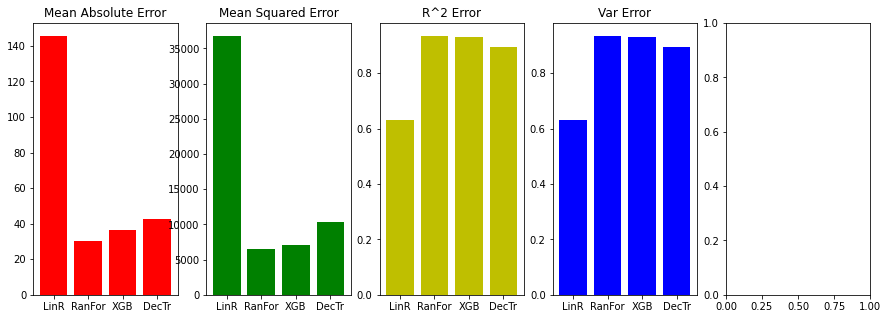

In [47]:
plot_labels = ["LinR", "RanFor", "XGB", "DecTr"]
from math import sqrt

f, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1,ncols=5,figsize=(15,5))
ax1.bar(plot_labels,mae_list,color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,mse_list,color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,r2_list,color='y')
ax3.set_title("R^2 Error")
ax4.bar(plot_labels,var_list,color='b')
ax4.set_title("Var Error")
import operator


#  Further improvements discussed at the presentation

## Comparison between Normalized Data and Un-normalized Data 

After obtaining this result we decided to continue without normalizing the data.

      LinearRegression      RandomForest        XGBoost         DecisionTrees
MAE_wn-MAE [-0.5369430369184158, -0.8910084574785664, 1.6376647661363393, -1.0513595498787893]
MSE_wn-MSE [-336.60650406982313, -252.68559017756797, 222.80117601546954, -488.6181125071744]
R2_wn-R2 [0.005570870475747114, 0.0029354176455099745, -0.0018359409394455017, 0.0055456897388621584]
Var_wn-Var [0.005603633325767854, 0.0029386714464416652, -0.0018263104423253962, 0.005576764216771113]
Max_wn-Max [0.6669297282355728, -19.02748000000031, -47.24627685546875, -119.88353571428581]


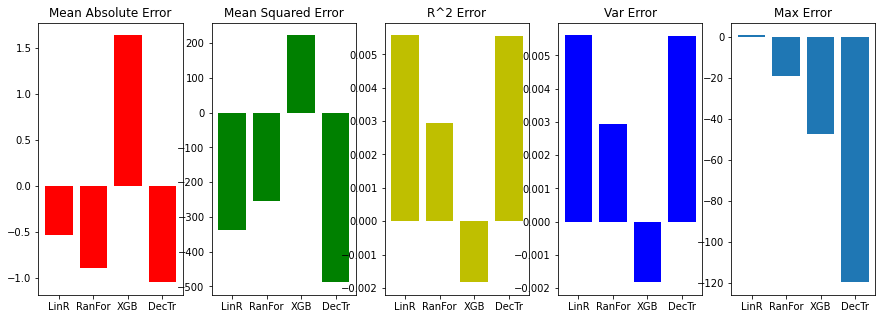

In [48]:
# Without Normalization
MAE_wn =  [145.53663438816486, 30.260374034873056, 36.45372562953167, 42.841940617746474]
MSE_wn = [36765.7328385265, 6494.071158381085, 7011.396019976234, 10347.625717452076]
R2_wn = [0.6308764850087383, 0.9348003103021767, 0.9296064312044026, 0.8961110881859694]
Var_wn = [0.6309326107714461, 0.9348176119897434, 0.9296161064797657, 0.896182079743132]
Max_wn = [1047.1185829606309, 881.2118000000008, 1033.2645776367187, 922.72375]

# With Normalization
MAE = [146.07357742508327, 31.151382492351622, 34.81606086339533, 43.89330016762526]
MSE = [37102.33934259632, 6746.756748558653, 6788.594843960765, 10836.24382995925]
R2 = [0.6253056145329912, 0.9318648926566667, 0.9314423721438481, 0.8905653984471072]
Var = [0.6253289774456783, 0.9318789405433018, 0.9314424169220911, 0.8906053155263609]
Max = [1046.4516532323953, 900.2392800000011, 1080.5108544921875, 1042.6072857142858]

print('      LinearRegression      RandomForest        XGBoost         DecisionTrees')
print('MAE_wn-MAE', list(map(operator.sub, MAE_wn, MAE)))
print('MSE_wn-MSE', list(map(operator.sub, MSE_wn, MSE)))
print('R2_wn-R2', list(map(operator.sub, R2_wn, R2)))
print('Var_wn-Var', list(map(operator.sub, Var_wn, Var)))
print('Max_wn-Max', list(map(operator.sub, Max_wn, Max)))
ax5.set_title("Max Error")
plt.show()


plot_labels = ["LinR", "RanFor", "XGB", "DecTr"]
from math import sqrt

f, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1,ncols=5,figsize=(15,5))
ax1.bar(plot_labels,list(map(operator.sub, MAE_wn, MAE)),color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,list(map(operator.sub, MSE_wn, MSE)),color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,list(map(operator.sub, R2_wn, R2)),color='y')
ax3.set_title("R^2 Error")
ax4.bar(plot_labels,list(map(operator.sub, Var_wn, Var)),color='b')
ax4.set_title("Var Error")
ax5.bar(plot_labels,list(map(operator.sub, Max_wn, Max)))
ax5.set_title("Max Error")
plt.show()


##Decition Tree with prunning parameter

In [49]:
 #param_grid = {
#     'max_depth': [None, 3, 5, 10], 
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'random_state': [None, 1, 2, 3, 4], 
#     'min_samples_split': [2, 3, 4],
#     'ccp_alpha': ['non-negative', 'float', 0]}    
# grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, cv=5,
#                            scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
# grid_search.fit(train_data, train_labels)
# results = grid_search.cv_results_
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#     print("Mean score", np.sqrt(-mean_score), "with the following params",params)

# print("Best estim: ")
# grid_search.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1827s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0632s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0581s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1022s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1486s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.3s
[Parallel(n

Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': None}
Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 1}
Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 2}
Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 3}
Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 4}
Mean score nan with the following params {'ccp_alpha': 'non-negative', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 3, 'random_state': None}
Mean score nan with the following params {'ccp_alpha

DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

Best estim: 
DecisionTreeRegressor(
    
    ccp_alpha=0.0, criterion='mse', max_depth=10,
                      
    max_features='auto', max_leaf_nodes=None,
             
    min_impurity_decrease=0.0, min_impurity_split=None,
                      
    min_samples_leaf=1, min_samples_split=3,
                      
    min_weight_fraction_leaf=0.0, presort='deprecated',
                      
    random_state=3, splitter='best')

In [50]:
Model4 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      
                      max_features='auto', max_leaf_nodes=None,
                      
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      
                      min_samples_leaf=1, min_samples_split=3,
                      
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      
                      random_state=3, splitter='best')
Model4.fit(train_data, train_labels)
Pred4 = Model4.predict(test_data)

print('MAE : ', mean_absolute_error(test_labels, Pred4 ))
print('MSE : ', mean_squared_error(test_labels, Pred4 ))
print('R^2 : ', r2_score(test_labels, Pred4 ))
print('Var : ', explained_variance_score(test_labels, Pred4 ))
print('Max : ', max_error(test_labels, Pred4 ))

MAE :  42.55817503102817
MSE :  10098.317452316605
R^2 :  0.8986141130419502
Var :  0.8986633719110002
Max :  922.72375


Old Parameters -------------------------------New Parameters

MAE :  42.841940617746474-----------42.55817503102817

MSE :  10347.625717452076-----------10098.317452316605

R^2 :  0.8961110881859694-----------0.8986141130419502

Var :  0.896182079743132------------0.8986633719110002

Max :  922.72375--------------------922.72375

## XgBoost with learning rate and number of estimators

In [ ]:
#param_grid = {
#            'learning rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#            'min_child_weight': [1, 4, 7],
#            'gamma': [0, 0.5, 1],
#            'subsample': [0.8, 1],
#            'colsample_bytree':[0.8, 1],
#            'max_depth': [3, 6, 9],
#            'n-estimators': [50,100,200]
#            }#

#grid_search = GridSearchCV(
#            estimator=XGBRegressor(objective = 'reg:squarederror'),
#            param_grid=param_grid,
#            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

#grid_result = grid_search.fit(train_data, train_labels)
#results = grid_search.cv_results_
#for mean_score, params in zip(results['mean_test_score'], results['params']):
#    print("Mean score", np.sqrt(-mean_score), "with the following params")
#    print(params)

#print("Best estim: ")
#print(grid_search.best_estimator_)

In [52]:
Model3 = XGBRegressor(objective = 'reg:squarederror',colsample_bytree=0.8, gamma=0,
                      max_depth=9, min_child_weight=4, learning_rate=0.05, subsample=0.8,
            n_estimators=200)
Model3.fit(train_data, train_labels)
Pred3 = Model3.predict(test_data)

print('MAE : ', mean_absolute_error(test_labels, Pred3 ))
print('MSE : ', mean_squared_error(test_labels, Pred3 ))
print('R^2 : ', r2_score(test_labels, Pred3 ))
print('Var : ', explained_variance_score(test_labels, Pred3 ))
print('Max : ', max_error(test_labels, Pred3 ))

MAE :  34.82895552785271
MSE :  6696.24227124527
R^2 :  0.9327705367590278
Var :  0.9327796643591775
Max :  1012.6107690429687


Old parameters New------------------Parameters

MAE :  36.45372562953167-------34.82895552785271

MSE :  7011.396019976234-------6696.24227124527

R^2 :  0.9296064312044026 ------0.9327705367590278

Var :  0.9296161064797657  -------0.9327796643591775

Max :  1033.2645776367187------1012.6107690429687